In [1]:
import augmentation, torch, torchvision
import matplotlib.pyplot as plt

# Ignore Warning
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
dataset = torchvision.datasets.CIFAR10('../../../../data/OCR/Jason/cifar10/', train=False, download=False)

In [3]:
ex1, ex2, ex3, ex4 = dataset[2], dataset[25], dataset[28], dataset[42]

In [4]:
M = 30

color_range = torch.arange(0, 0.9+1e-8, (0.9-0)/M).tolist()
rotate_range = torch.arange(0, 30+1e-8, (30-0)/M).tolist()
shear_range = torch.arange(0, 0.3+1e-8, (0.3-0)/M).tolist()
translate_range = torch.arange(0, 10+1e-8, (10-0)/M).tolist()


Mag = {'Brightness' : color_range, 'Color' : color_range, 'Contrast' : color_range, 
       'Posterize' : torch.arange(4, 8+1e-8, (8-4)/M).tolist()[::-1], 'Sharpness' : color_range, 
       'Solarize' : torch.arange(0, 256+1e-8, (256-0)/M).tolist()[::-1], 
       'SolarizeAdd' : torch.arange(0, 110+1e-8, (110-0)/M).tolist(), 
       
       'Cutout' : torch.arange(0, 32*0.15+1e-8, (32*0.15-0)/M),
       
       'Rotate' : rotate_range, 'ShearX' : shear_range, 'ShearY' : shear_range,
       'TranslateX' : translate_range, 'TranslateY' : translate_range}


Fun = {'Brightness' : augmentation.Brightness, 
       'Color' : augmentation.Color, 'Contrast' : augmentation.Contrast,  
       'Posterize' : augmentation.Posterize, 'Sharpness' : augmentation.Sharpness, 
       'Solarize' : augmentation.Solarize, 'SolarizeAdd' : augmentation.SolarizeAdd,
       
       'Cutout' : augmentation.Cutout,
         
       'Rotate' : augmentation.Rotate, 'ShearX' : augmentation.ShearX, 'ShearY' : augmentation.ShearY, 
       'TranslateX' : augmentation.TranslateX, 'TranslateY' : augmentation.TranslateY}

In [5]:
aug_list, title_list = [], []
M = [4, 11]

for f in Fun:
    if f in ['Cutout', 'Posterize', 'Solarize']: aug_list.append([Fun[f](1, Mag[f][M[0]]), Fun[f](1, Mag[f][M[1]])])
    else: aug_list.append([Fun[f](1, Mag[f][M[0]], minus=False), Fun[f](1, Mag[f][M[1]], minus=False)])
    title_list.append(['Function : {}, Magnitude : {}'.format(f, M[0]), 'Function : {}, Magnitude : {}'.format(f, M[1])])

In [6]:
for a, t in zip(aug_list, title_list):
    print(a)
    print(t)
    print()

[Brightness(p=1, magnitude=0.11999999731779099), Brightness(p=1, magnitude=0.32999998331069946)]
['Function : Brightness, Magnitude : 4', 'Function : Brightness, Magnitude : 11']

[Color(p=1, magnitude=0.11999999731779099), Color(p=1, magnitude=0.32999998331069946)]
['Function : Color, Magnitude : 4', 'Function : Color, Magnitude : 11']

[Contrast(p=1, magnitude=0.11999999731779099), Contrast(p=1, magnitude=0.32999998331069946)]
['Function : Contrast, Magnitude : 4', 'Function : Contrast, Magnitude : 11']

[Posterize(p=1, bits=7), Posterize(p=1, bits=6)]
['Function : Posterize, Magnitude : 4', 'Function : Posterize, Magnitude : 11']

[Sharpness(p=1, magnitude=0.11999999731779099), Sharpness(p=1, magnitude=0.32999998331069946)]
['Function : Sharpness, Magnitude : 4', 'Function : Sharpness, Magnitude : 11']

[Solarize(p=1, threshold=221), Solarize(p=1, threshold=162)]
['Function : Solarize, Magnitude : 4', 'Function : Solarize, Magnitude : 11']

[SolarizeAdd(p=1, addition=14, threshold=1

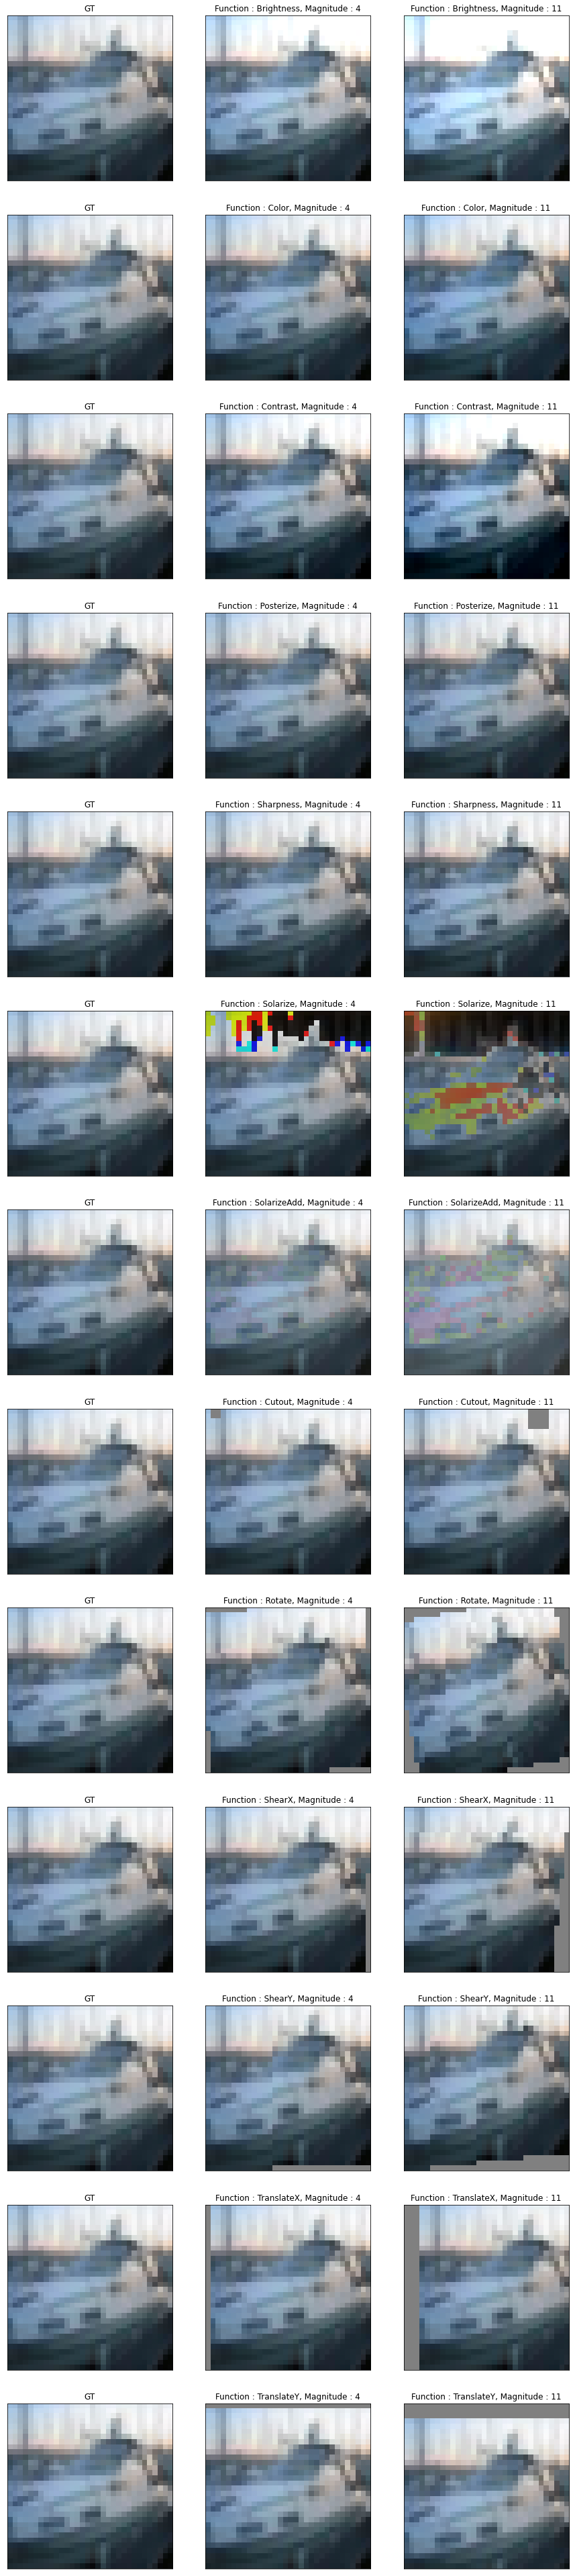

In [7]:
plt.figure(figsize=(15, 70))
plt.rcParams['axes.titlesize'] = 12
plt.axis('off')

for i in range(len(aug_list)):
    plt.subplot(13, 3, 3*i+1)
    image, label = ex1
    img = plt.imshow(image); img.axes.get_xaxis().set_visible(False); img.axes.get_yaxis().set_visible(False)
    plt.gca().set_title('GT')
    
    for j in range(len(aug_list[i])):
        plt.subplot(13, 3, 3*i + j + 2)
        aug_image = aug_list[i][j](image)
        aug_image = plt.imshow(aug_image)
        aug_image.axes.get_xaxis().set_visible(False); aug_image.axes.get_yaxis().set_visible(False)
        plt.gca().set_title(title_list[i][j])

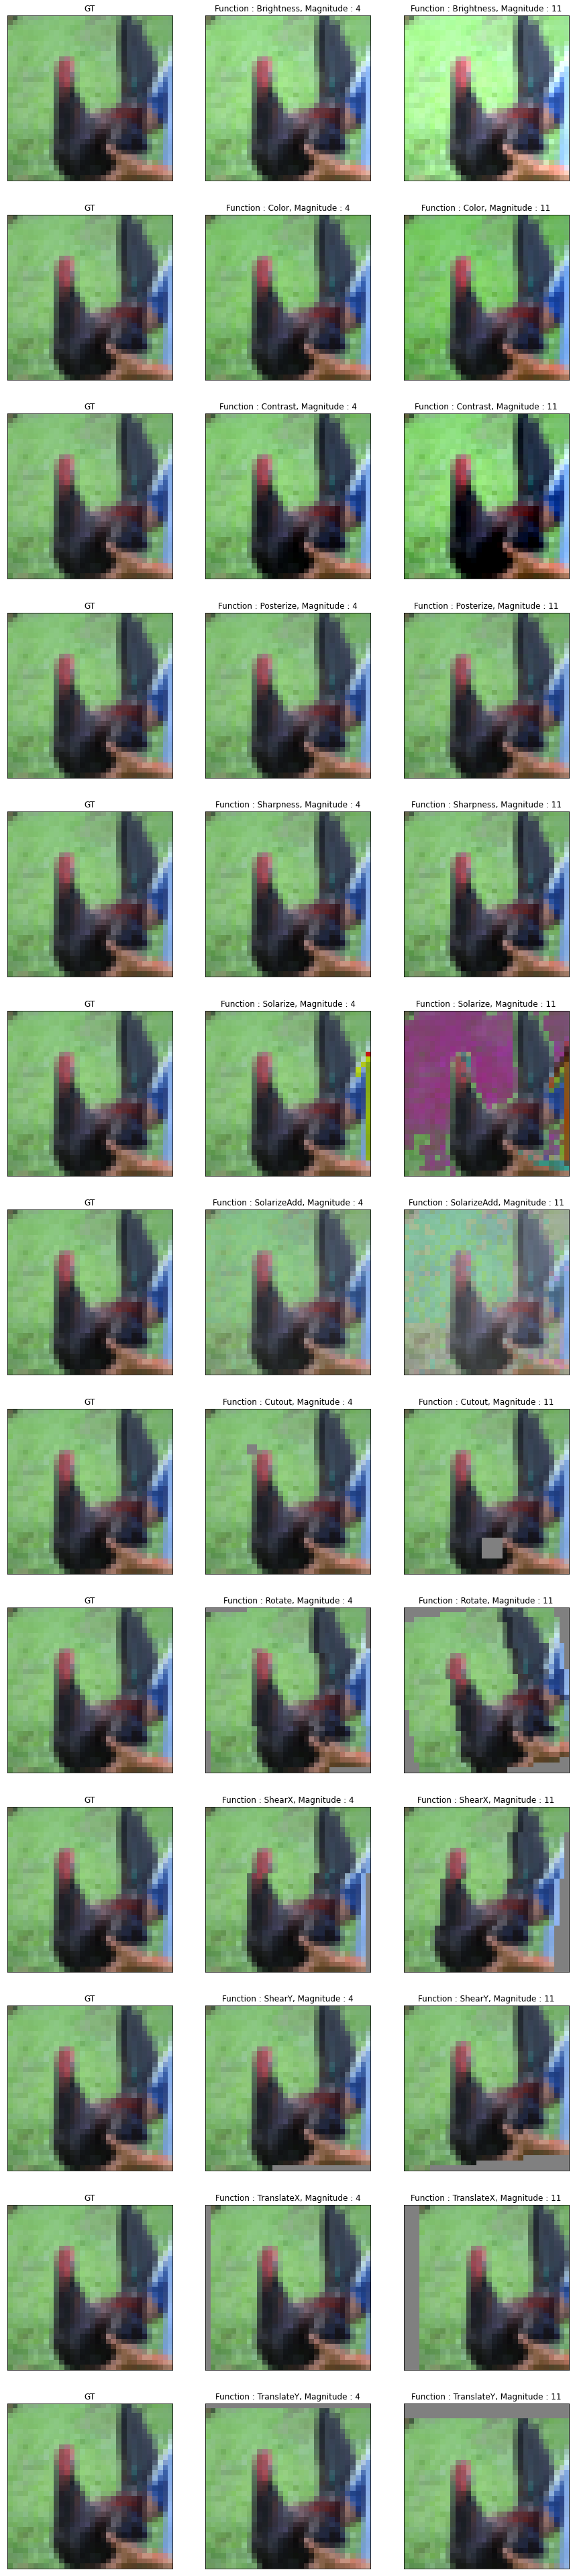

In [8]:
plt.figure(figsize=(15, 70))
plt.rcParams['axes.titlesize'] = 12
plt.axis('off')

for i in range(len(aug_list)):
    plt.subplot(13, 3, 3*i+1)
    image, label = ex2
    img = plt.imshow(image); img.axes.get_xaxis().set_visible(False); img.axes.get_yaxis().set_visible(False)
    plt.gca().set_title('GT')

    for j in range(len(aug_list[i])):
        plt.subplot(13, 3, 3*i + j + 2)
        aug_image = aug_list[i][j](image)
        aug_image = plt.imshow(aug_image)
        aug_image.axes.get_xaxis().set_visible(False); aug_image.axes.get_yaxis().set_visible(False)
        plt.gca().set_title(title_list[i][j])

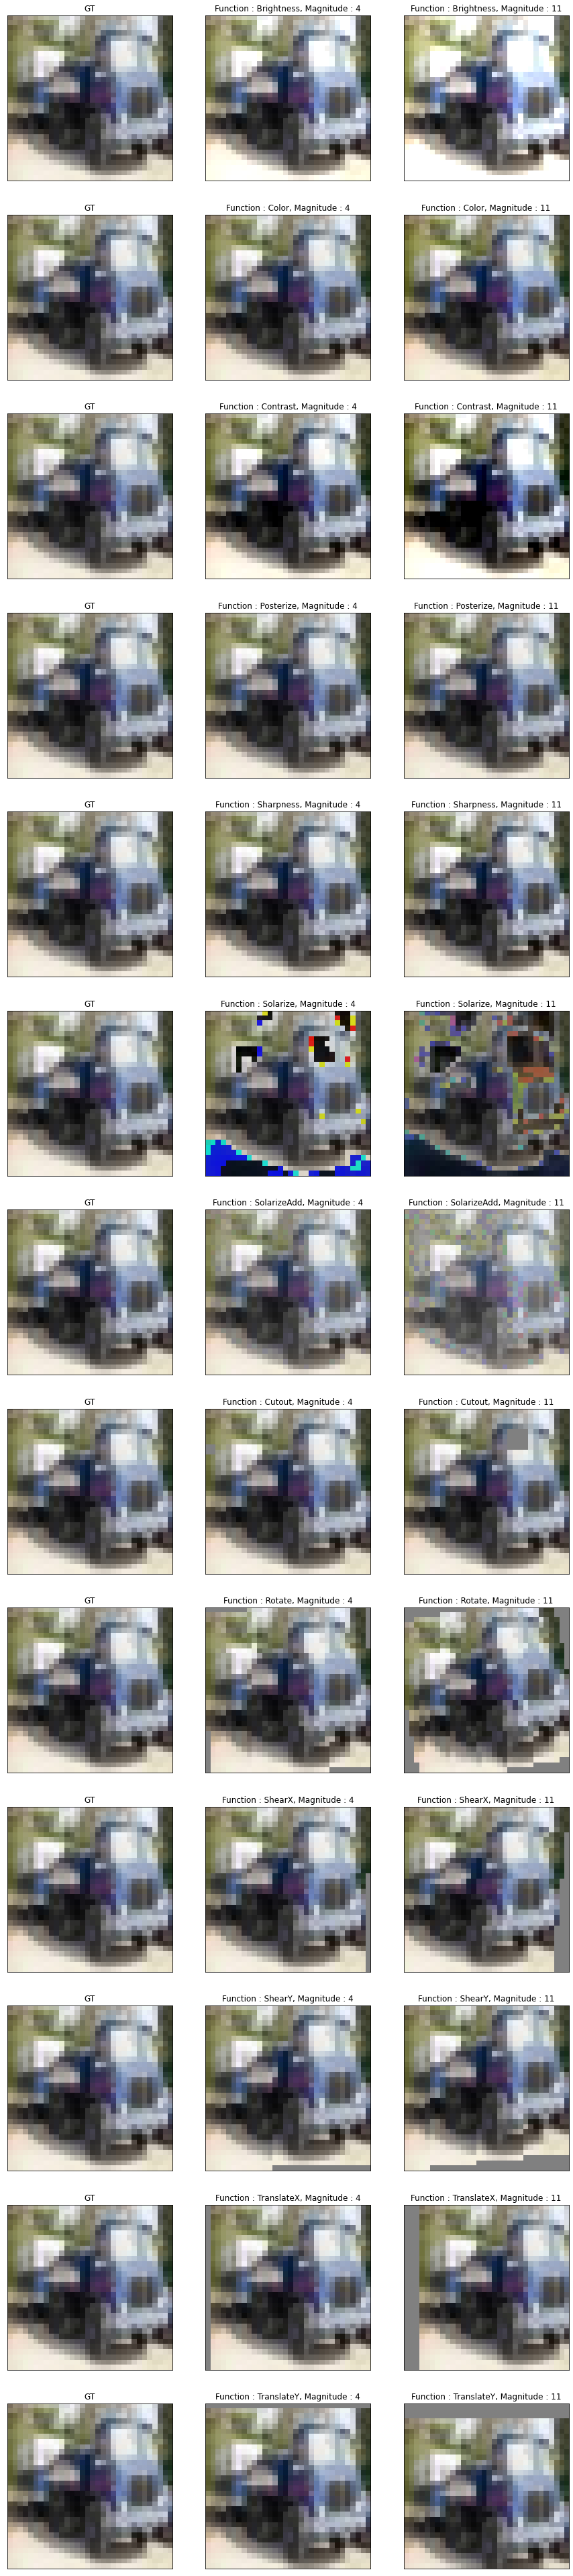

In [9]:
plt.figure(figsize=(15, 70))
plt.rcParams['axes.titlesize'] = 12
plt.axis('off')

for i in range(len(aug_list)):
    plt.subplot(13, 3, 3*i+1)
    image, label = ex3
    img = plt.imshow(image); img.axes.get_xaxis().set_visible(False); img.axes.get_yaxis().set_visible(False)
    plt.gca().set_title('GT')

    for j in range(len(aug_list[i])):
        plt.subplot(13, 3, 3*i + j + 2)
        aug_image = aug_list[i][j](image)
        aug_image = plt.imshow(aug_image)
        aug_image.axes.get_xaxis().set_visible(False); aug_image.axes.get_yaxis().set_visible(False)
        plt.gca().set_title(title_list[i][j])

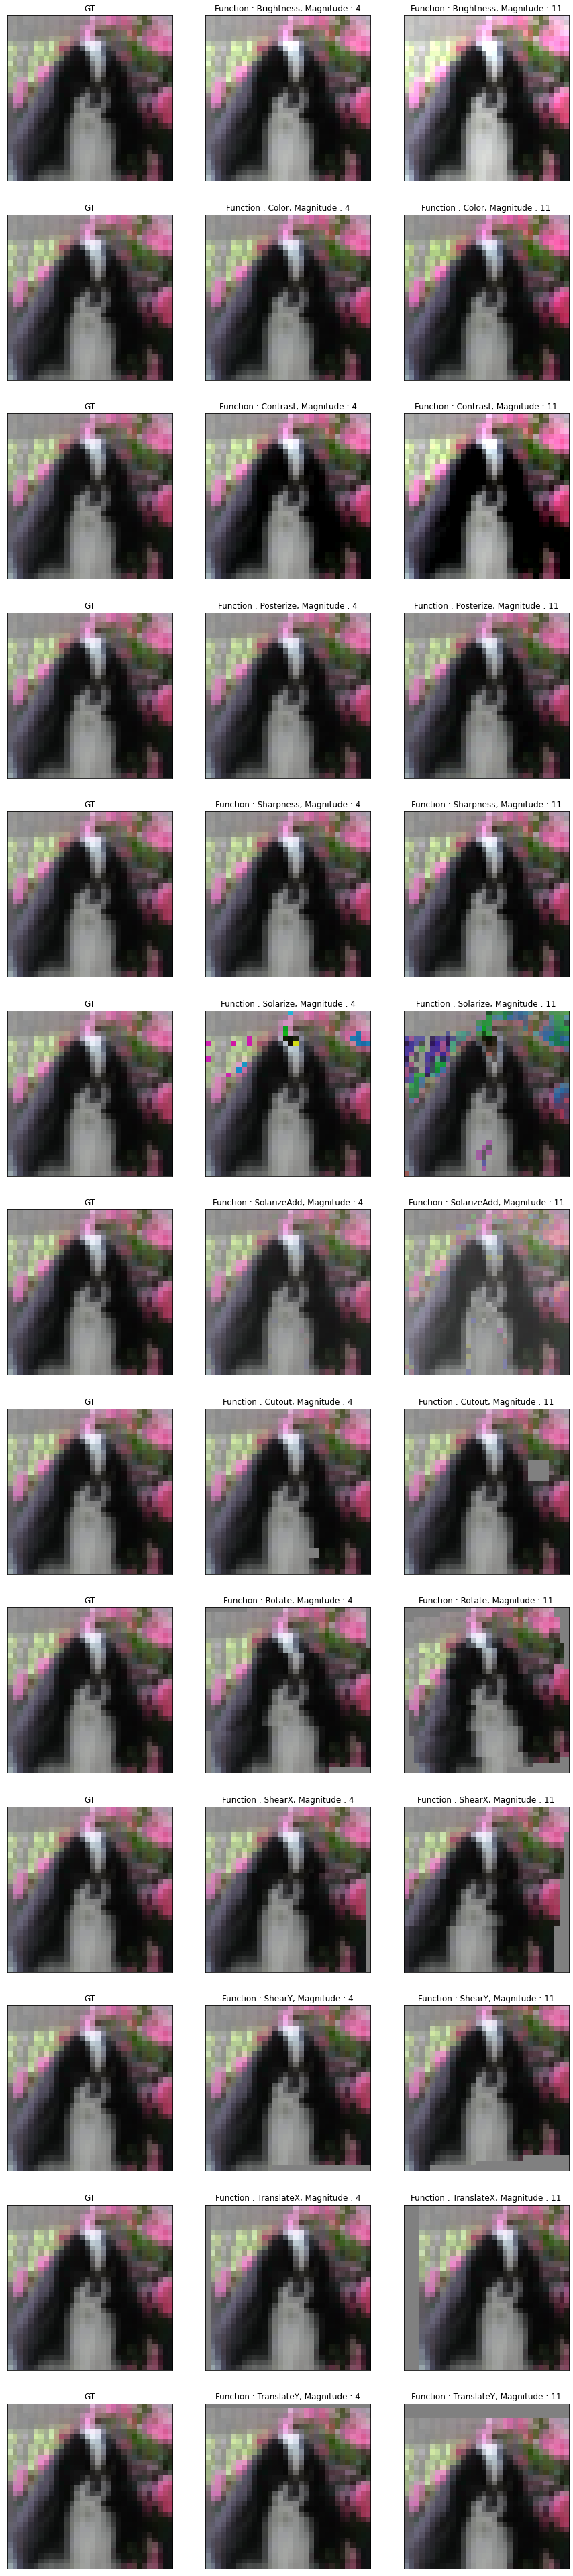

In [10]:
plt.figure(figsize=(15, 70))
plt.rcParams['axes.titlesize'] = 12
plt.axis('off')

for i in range(len(aug_list)):
    plt.subplot(13, 3, 3*i+1)
    image, label = ex4
    img = plt.imshow(image); img.axes.get_xaxis().set_visible(False); img.axes.get_yaxis().set_visible(False)
    plt.gca().set_title('GT')
    
    for j in range(len(aug_list[i])):
        plt.subplot(13, 3, 3*i + j + 2)
        aug_image = aug_list[i][j](image)
        aug_image = plt.imshow(aug_image)
        aug_image.axes.get_xaxis().set_visible(False); aug_image.axes.get_yaxis().set_visible(False)
        plt.gca().set_title(title_list[i][j])